In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

C:\Users\JVS Tanish\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
import pandas as pd
data = pd.read_csv('wavefiles.csv')
data

,file_name,classID,label
0,melody0.wav,1,antiviral
1,melody1.wav,1,antiviral
2,melody2.wav,1,antiviral
3,melody3.wav,1,antiviral
4,melody4.wav,1,antiviral
...,...,...,...
1698,melody1698.wav,4,anti-coronavirus
1699,melody1699.wav,4,anti-coronavirus
1700,melody1700.wav,4,anti-coronavirus
1701,melody1701.wav,4,anti-coronavirus


In [3]:
Directory = 'C:/Users/JVS Tanish/Downloads/MidMinorProject/music-melodies'

In [4]:
from tqdm import tqdm
import os
extracted_data = []
for index,row in tqdm(data.iterrows()):
    file_name = os.path.join(os.path.abspath(Directory),str(row["file_name"]))
    class_labels= row["label"]
    y,sr = librosa.load(file_name, res_type='kaiser_fast')
    feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50)
    scaled_feature = np.mean(feature.T,axis=0)
    extracted_data.append([scaled_feature, class_labels])

1703it [08:04,  3.51it/s]


In [5]:
feature_df = pd.DataFrame(extracted_data, columns=['feature','class'])

In [6]:
x = np.array(feature_df['feature'].tolist())

In [7]:
y = np.array(feature_df['class'].tolist())

In [8]:
print(x.shape)
print(y.shape)

(1703, 50)
(1703,)


In [9]:
from sklearn import preprocessing

OHE_Function = OneHotEncoder()
Scaler_Function = StandardScaler()

In [10]:
Part_Y_Encode = OHE_Function.fit_transform(np.array(y).reshape(-1,1)).toarray()
print(Part_Y_Encode.shape)

(1703, 4)


In [82]:
Part_Y_Encode

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Part_Y_Encode, train_size=0.8, random_state = 42, shuffle=True)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1362, 50)
(1362, 4)
(341, 50)
(341, 4)


In [55]:
n_seq = 1
n_steps = 50
X_train = X_train.reshape(X_train.shape[0], n_seq, n_steps)
X_test = X_test.reshape(X_test.shape[0], n_seq, n_steps)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(1362, 1, 50)
(341, 1, 50)
(1362, 4)


In [56]:
output_labels = 4
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = "adam"

In [61]:
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.models import Sequential


#Adding the input LSTM network layer
LSTM_model= Sequential()
LSTM_model.add(LSTM(128, input_shape=(1,50), return_sequences=True))
LSTM_model.add(Dropout(0.2))
# model_LSTM.add(Dense(10, activation='softmax'))

#Adding a second LSTM network layer
LSTM_model.add(LSTM(128))

#Adding a dense hidden layer
LSTM_model.add(Dense(64, activation='relu'))
LSTM_model.add(Dropout(0.2))

#Adding the output layer
LSTM_model.add(Dense(output_labels, activation='softmax'))
LSTM_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 128)            91648     
                                                                 
 dropout_10 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 4)                 260       
                                                                 
Total params: 231,748
Trainable params: 231,748
Non-tr

In [62]:
LSTM_model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [63]:
import tensorflow as tf
Call_Back_Early_Stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Call_Back_Check_Hybrid = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_LSTM_model")

In [73]:
LSTM_Model = LSTM_model.fit(X_train, Y_train, epochs=200, batch_size=128, validation_data=(X_test, Y_test), callbacks=[Call_Back_Early_Stop,Call_Back_Check_Hybrid])

Epoch 1/200
11/11 [==============================] - 1s 71ms/step - loss: 0.7891 - accuracy: 0.6894 - val_loss: 0.9766 - val_accuracy: 0.6217
Epoch 2/200
11/11 [==============================] - 1s 68ms/step - loss: 0.7890 - accuracy: 0.6902 - val_loss: 0.9192 - val_accuracy: 0.6510
Epoch 3/200
11/11 [==============================] - ETA: 0s - loss: 0.7711 - accuracy: 0.6938

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 7s 672ms/step - loss: 0.7711 - accuracy: 0.6938 - val_loss: 0.9112 - val_accuracy: 0.6716
Epoch 4/200
11/11 [==============================] - 1s 74ms/step - loss: 0.7628 - accuracy: 0.6931 - val_loss: 0.9621 - val_accuracy: 0.6540
Epoch 5/200
11/11 [==============================] - 1s 74ms/step - loss: 0.7615 - accuracy: 0.6938 - val_loss: 0.9367 - val_accuracy: 0.6510
Epoch 6/200
11/11 [==============================] - 1s 72ms/step - loss: 0.7625 - accuracy: 0.7004 - val_loss: 0.9440 - val_accuracy: 0.6393
Epoch 7/200
11/11 [==============================] - 1s 50ms/step - loss: 0.7534 - accuracy: 0.6968 - val_loss: 0.9406 - val_accuracy: 0.6540
Epoch 8/200
11/11 [==============================] - 1s 64ms/step - loss: 0.7549 - accuracy: 0.6997 - val_loss: 0.9358 - val_accuracy: 0.6393
Epoch 9/200
11/11 [==============================] - 1s 51ms/step - loss: 0.7614 - accuracy: 0.6887 - val_loss: 0.9343 - val_accuracy: 0.6598
Epoch 10/200
11/1

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 8s 749ms/step - loss: 0.7156 - accuracy: 0.7210 - val_loss: 0.9182 - val_accuracy: 0.6745
Epoch 16/200
11/11 [==============================] - 1s 73ms/step - loss: 0.7123 - accuracy: 0.7166 - val_loss: 0.9288 - val_accuracy: 0.6569
Epoch 17/200
11/11 [==============================] - 1s 63ms/step - loss: 0.6985 - accuracy: 0.7188 - val_loss: 0.9369 - val_accuracy: 0.6540
Epoch 18/200
11/11 [==============================] - 1s 73ms/step - loss: 0.7208 - accuracy: 0.7225 - val_loss: 0.9294 - val_accuracy: 0.6716
Epoch 19/200
11/11 [==============================] - 1s 75ms/step - loss: 0.7011 - accuracy: 0.7283 - val_loss: 0.9238 - val_accuracy: 0.6481
Epoch 20/200
11/11 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.7276

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 6s 641ms/step - loss: 0.6937 - accuracy: 0.7276 - val_loss: 0.9279 - val_accuracy: 0.6774
Epoch 21/200
11/11 [==============================] - 1s 49ms/step - loss: 0.6887 - accuracy: 0.7144 - val_loss: 0.9287 - val_accuracy: 0.6686
Epoch 22/200
11/11 [==============================] - 0s 46ms/step - loss: 0.6858 - accuracy: 0.7364 - val_loss: 0.9419 - val_accuracy: 0.6686
Epoch 23/200
11/11 [==============================] - ETA: 0s - loss: 0.7016 - accuracy: 0.7070

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 7s 677ms/step - loss: 0.7016 - accuracy: 0.7070 - val_loss: 0.9164 - val_accuracy: 0.6804
Epoch 24/200
11/11 [==============================] - 1s 74ms/step - loss: 0.7126 - accuracy: 0.7232 - val_loss: 0.8930 - val_accuracy: 0.6657
Epoch 25/200
11/11 [==============================] - 1s 59ms/step - loss: 0.6956 - accuracy: 0.7115 - val_loss: 0.9319 - val_accuracy: 0.6774


In [74]:
train_accuracy = LSTM_model.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy of LSTM: ", train_accuracy[1])

test_accuracy = LSTM_model.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy of LSTM: ", test_accuracy[1])

Training Accuracy of LSTM:  0.7885462641716003
Testing Accuracy of LSTM:  0.6774193644523621


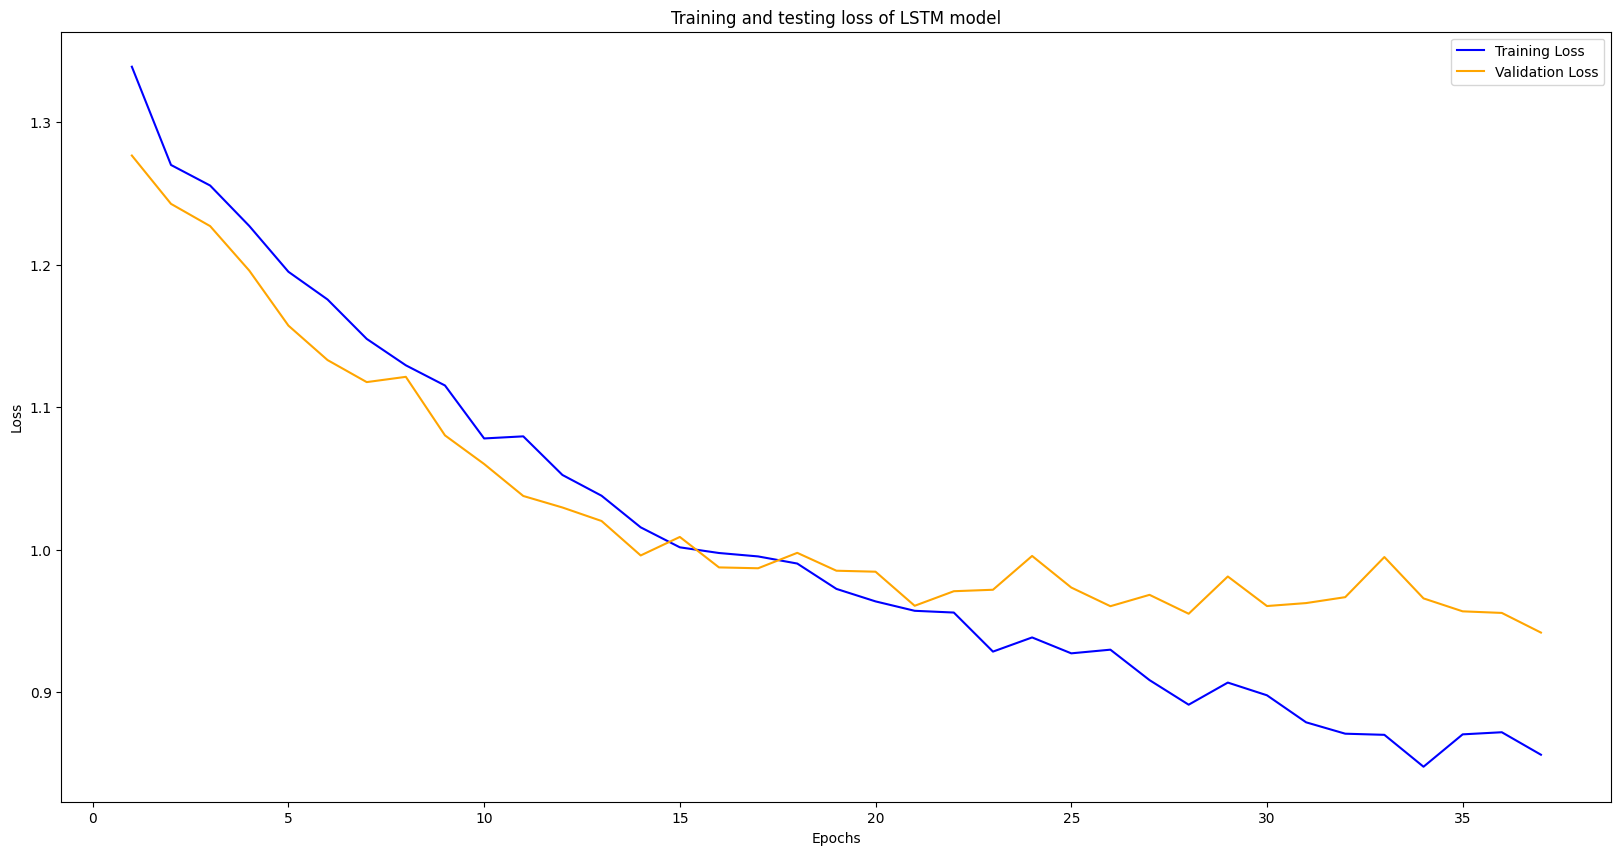

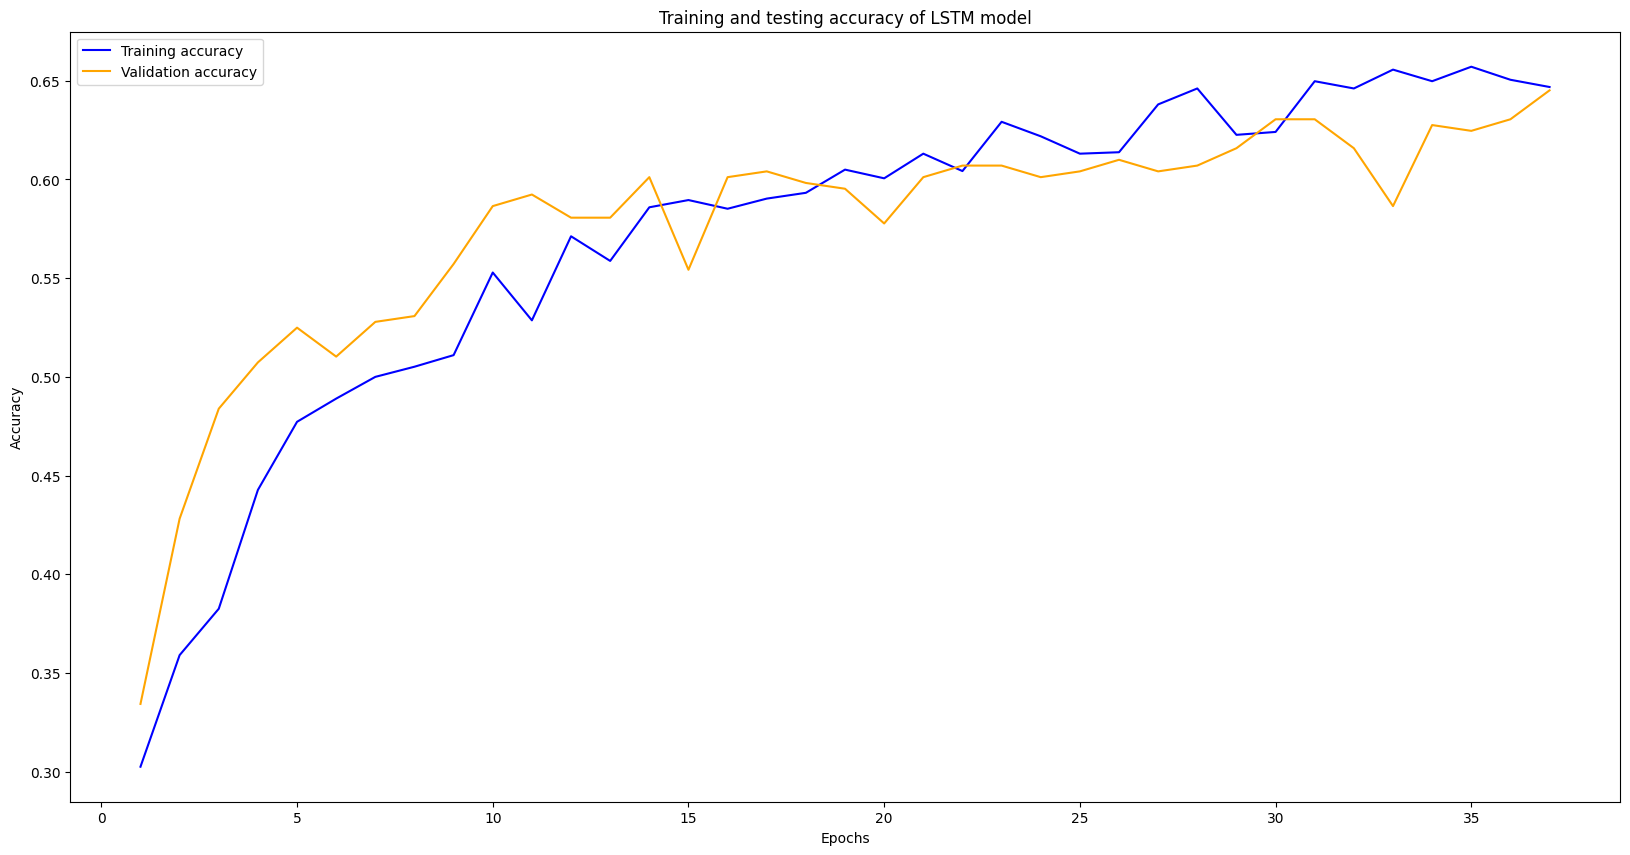

In [66]:
history_dict=LSTM_Model.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,38)

plt.figure(1,figsize=(20,10))
plt.plot(epochs,loss_values,'blue',label='Training Loss')
plt.plot(epochs,val_loss_values,'orange', label='Validation Loss')
plt.title('Training and testing loss of LSTM model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2,figsize=(20,10))
plt.plot(epochs,acc_values,'blue', label='Training accuracy')
plt.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
plt.title('Training and testing accuracy of LSTM model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

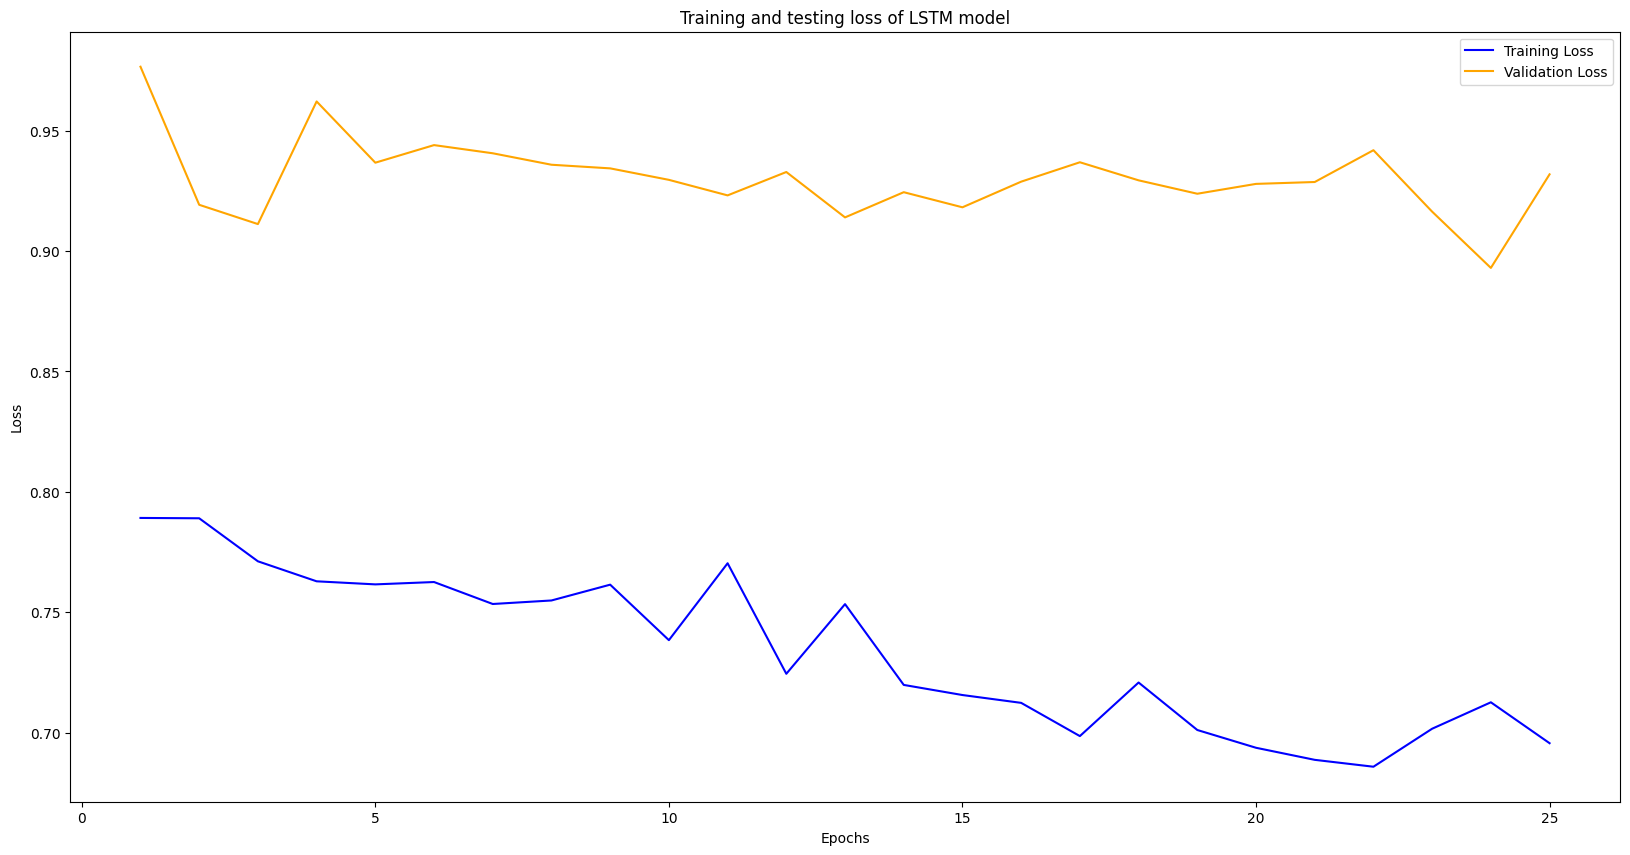

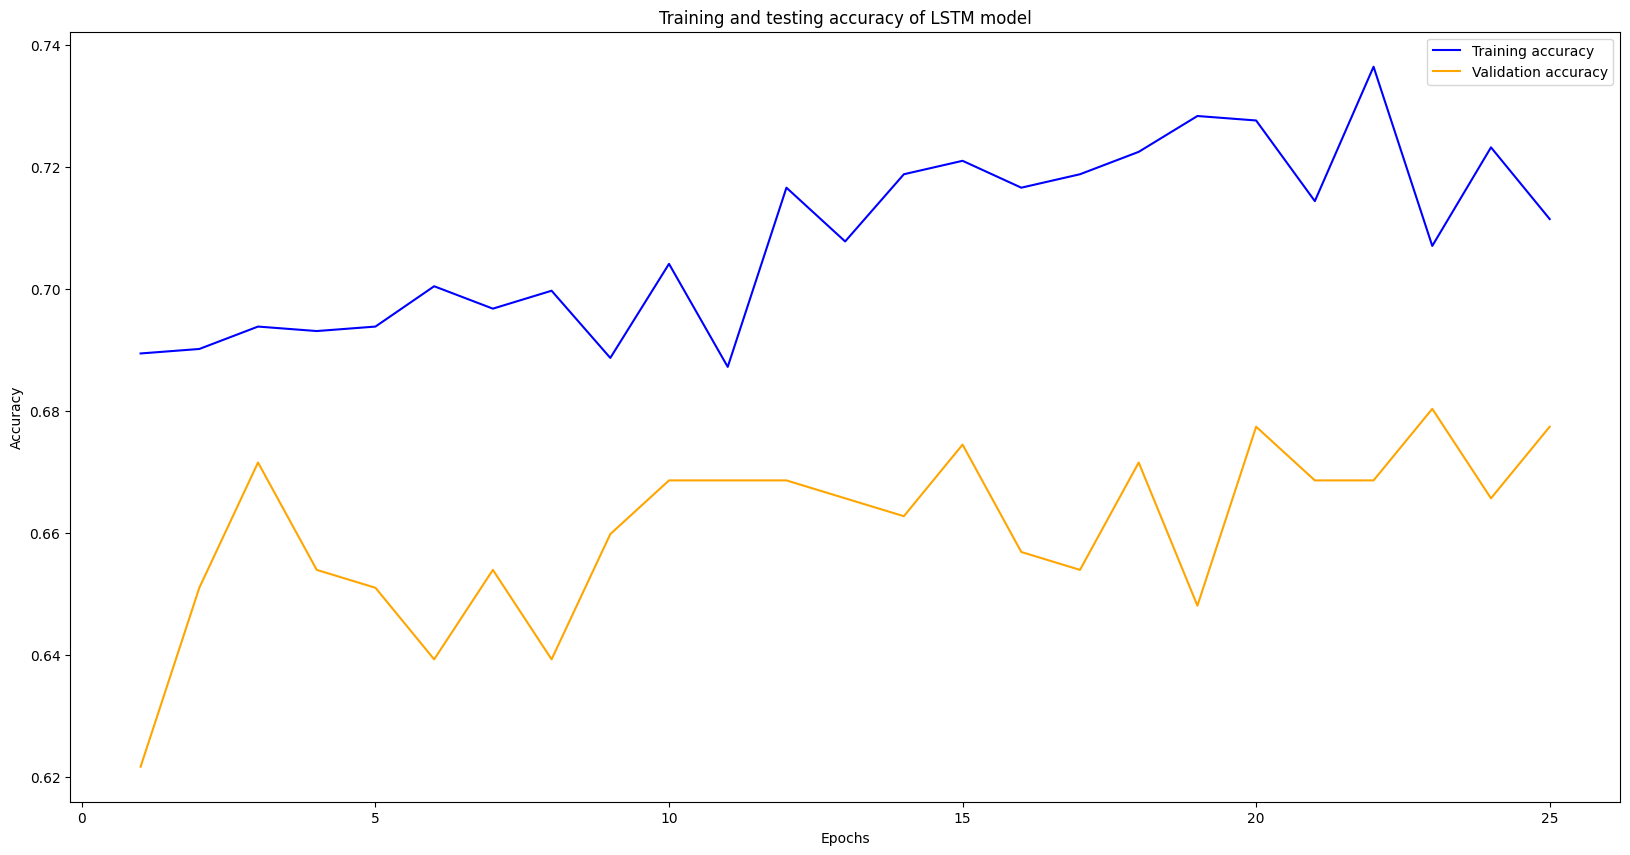

In [75]:
history_dict=LSTM_Model.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,26)

plt.figure(1,figsize=(20,10))
plt.plot(epochs,loss_values,'blue',label='Training Loss')
plt.plot(epochs,val_loss_values,'orange', label='Validation Loss')
plt.title('Training and testing loss of LSTM model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2,figsize=(20,10))
plt.plot(epochs,acc_values,'blue', label='Training accuracy')
plt.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
plt.title('Training and testing accuracy of LSTM model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<AxesSubplot: title={'center': 'LSTM'}>

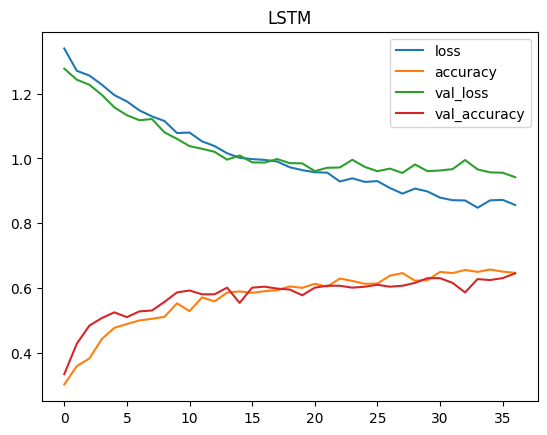

In [67]:
#1
Grap_Data_LSTM = pd.DataFrame(LSTM_Model.history)
Grap_Data_LSTM.plot(title='LSTM')

<AxesSubplot: title={'center': 'LSTM'}>

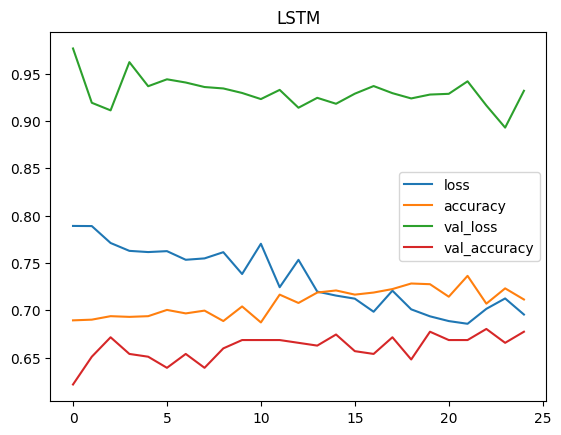

In [76]:
#2
Grap_Data_LSTM = pd.DataFrame(LSTM_Model.history)
Grap_Data_LSTM.plot(title='LSTM')

In [77]:
LSTM_model.save('saved_models/LSTM_model')

INFO:tensorflow:Assets written to: saved_models/LSTM_model\assets


INFO:tensorflow:Assets written to: saved_models/LSTM_model\assets


In [79]:
import tensorflow as tf
LSTM_model=tf.keras.models.load_model('saved_models/LSTM_model')

In [80]:
y_pred = LSTM_model.predict(X_test)

11/11 [==============================] - 1s 5ms/step


In [81]:
y_pred

array([[1.21169095e-03, 6.04889169e-03, 3.27400267e-02, 9.59999382e-01],
       [1.10753410e-01, 8.58097076e-01, 3.06865275e-02, 4.62932658e-04],
       [1.92343920e-01, 8.72594491e-02, 4.78136480e-01, 2.42260143e-01],
       ...,
       [3.05311382e-01, 5.50843418e-01, 1.20001994e-01, 2.38431841e-02],
       [8.67736191e-02, 7.95710146e-01, 5.43459915e-02, 6.31702691e-02],
       [3.64830680e-02, 4.80623573e-01, 4.69280422e-01, 1.36129595e-02]],
      dtype=float32)

In [83]:
y_pred_labels=[]
for j in range (0,len(y_pred)):
    max=y_pred[j][0]
    index=0
    for i in range(1,len(y_pred[j])):
        if(y_pred[j][i]>max):
            max=y_pred[j][i]
            index=i
    class_name=''
    if(index==0): class_name='anti-coronavirus'
    elif(index==1): class_name='antiviral'
    elif(index==2): class_name='exp-non-antiviral'
    else: class_name='random-seq-non-antiviral'
    y_pred_labels.append(class_name)

In [85]:
y_test_labels=[]
for j in range (0,len(Y_test)):
    index=0
    for i in range(0,len(Y_test[j])):
        if(Y_test[j][i]==1):
            max=Y_test[j][i]
            index=i
            break
    class_name=''
    if(index==0): class_name='anti-coronavirus'
    elif(index==1): class_name='antiviral'
    elif(index==2): class_name='exp-non-antiviral'
    else: class_name='random-seq-non-antiviral'
    y_test_labels.append(class_name)

In [86]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_labels, y_pred_labels)

In [87]:
cm_df = pd.DataFrame(cm, index = ['anti-coronavirus','antiviral','exp-non-antiviral ','random-seq-non-antiviral'], 
                     columns = ['anti-coronavirus','antiviral','exp-non-antiviral ','random-seq-non-antiviral'])
cm_df

,anti-coronavirus,antiviral,exp-non-antiviral,random-seq-non-antiviral
anti-coronavirus,3,12,4,3
antiviral,0,104,11,10
exp-non-antiviral,2,24,37,17
random-seq-non-antiviral,0,13,14,87


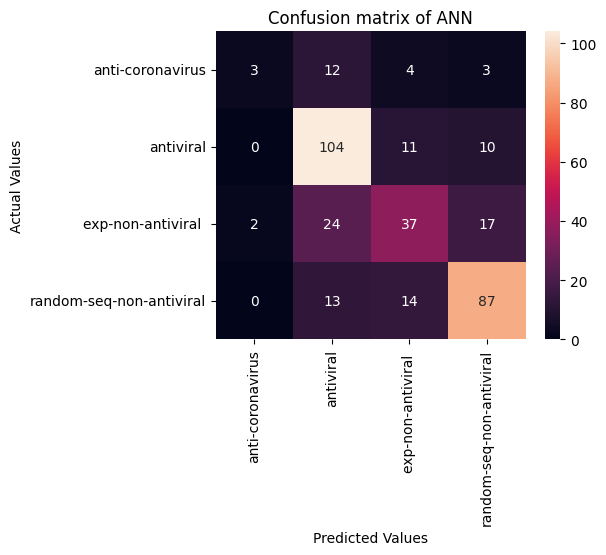

In [88]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot = True, fmt = 'd')
plt.title("Confusion matrix of ANN")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [95]:
print('                   Classification report of LTSM')
print('                   -----------------------------')
print('')
print(classification_report(y_test_labels, y_pred_labels))

                   Classification report of LTSM
                   -----------------------------

                          precision    recall  f1-score   support

        anti-coronavirus       0.60      0.14      0.22        22
               antiviral       0.68      0.83      0.75       125
       exp-non-antiviral       0.56      0.46      0.51        80
random-seq-non-antiviral       0.74      0.76      0.75       114

                accuracy                           0.68       341
               macro avg       0.65      0.55      0.56       341
            weighted avg       0.67      0.68      0.66       341

